# --- Glass Identification project--- 

## C SOMA SEKHAR GOUD

## Batch.No: DS2307

In [54]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
url ='https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv'
df = pd.read_csv(url, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Analysis & Pre-processing

## Attribute Information

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

• 1- building_windows_float_processed

• 2- building_windows_non_float_processed

• 3- vehicle_windows_float_processed

• 4- vehicle_windows_non_float_processed (none in this database)

• 5- containers

• 6- tableware

• 7- headlamps

### The column names are missing which were given in problem statement, we will add the columns to the above Data

In [10]:

# Define your header row as a list
header_row = ['Id_number', 'RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass']

# Assigning the header row to the DataFrame's columns
df.columns = header_row

df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


* RangeIndex: 214 entries, 0 to 213
* With 11 attributies
* Data Types: int64, float64

In [12]:
# checking for null values
df.isnull().sum()

Id_number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

### No Null values

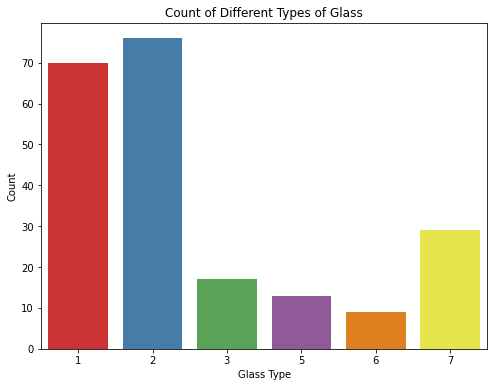

In [13]:
# Count the occurrences of each type of glass
glass_counts = df['Type_of_glass'].value_counts()

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=glass_counts.index, y=glass_counts.values, palette="Set1")
plt.title('Count of Different Types of Glass')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

* Types of glasses :7(1 to 7) with being 1,2 as high
* This is a highly unbalanced Data

In [14]:
df.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
# we will drop Id_number column
df = df.drop('Id_number',axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### All are numerical & we have no categorical values in DataFrame

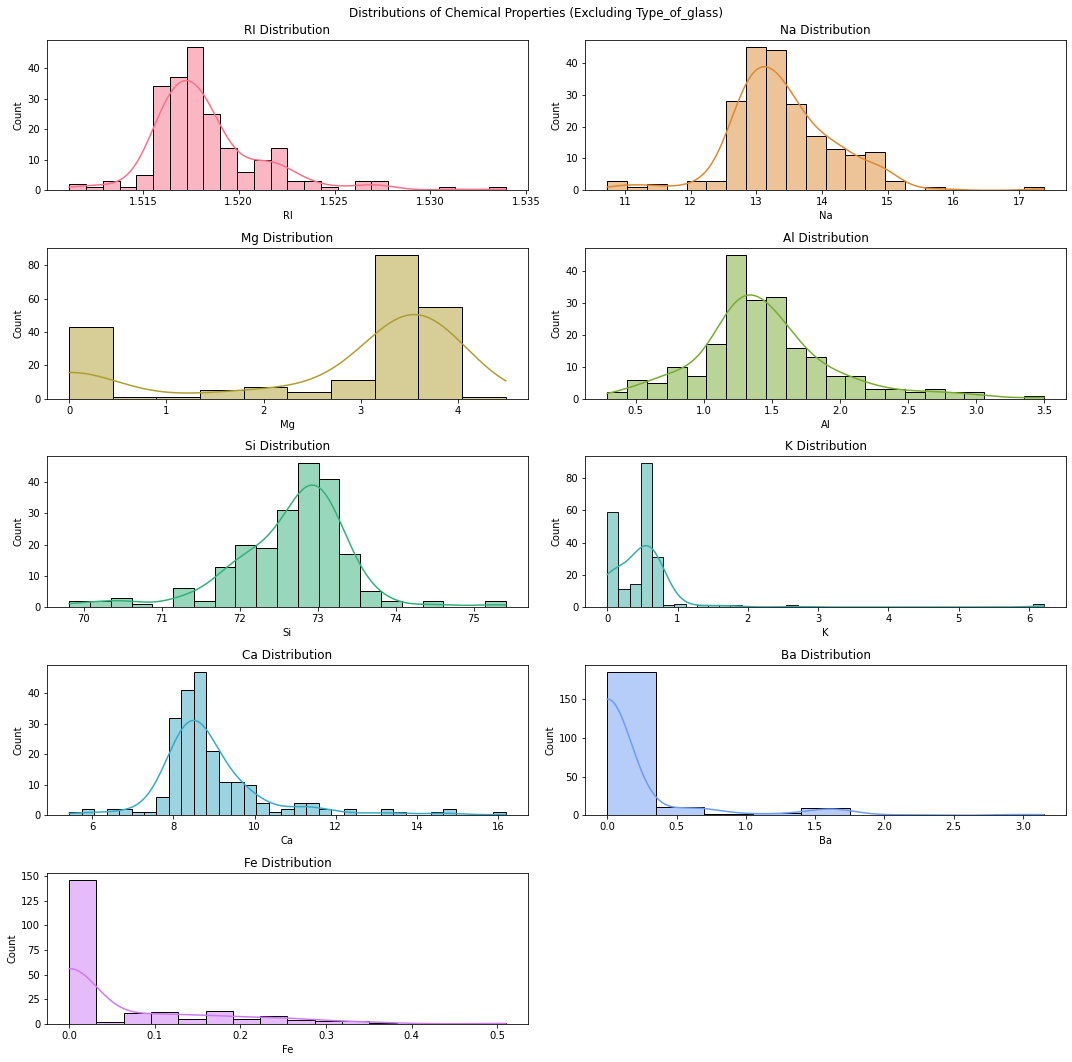

In [33]:
# Setting a custom color palette with enough colors
sns.set_palette("husl", 10)

# Defining the numerical features (excluding 'Type_of_glass')
numerical_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Create a 5x2 grid of distribution plots for numerical features
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
fig.suptitle('Distributions of Chemical Properties (Excluding Type_of_glass)')

for i, feature in enumerate(numerical_features):
    row, col = i // 2, i % 2
    sns.histplot(df[feature], kde=True, color=sns.color_palette()[i], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

# Remove any empty subplot(s) if there are more than 9 features
if len(numerical_features) < 10:
    fig.delaxes(axes[4, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Add some space for the title
plt.show()


### No attributes are having proper normal distribution either they are right skewed or left-skewed

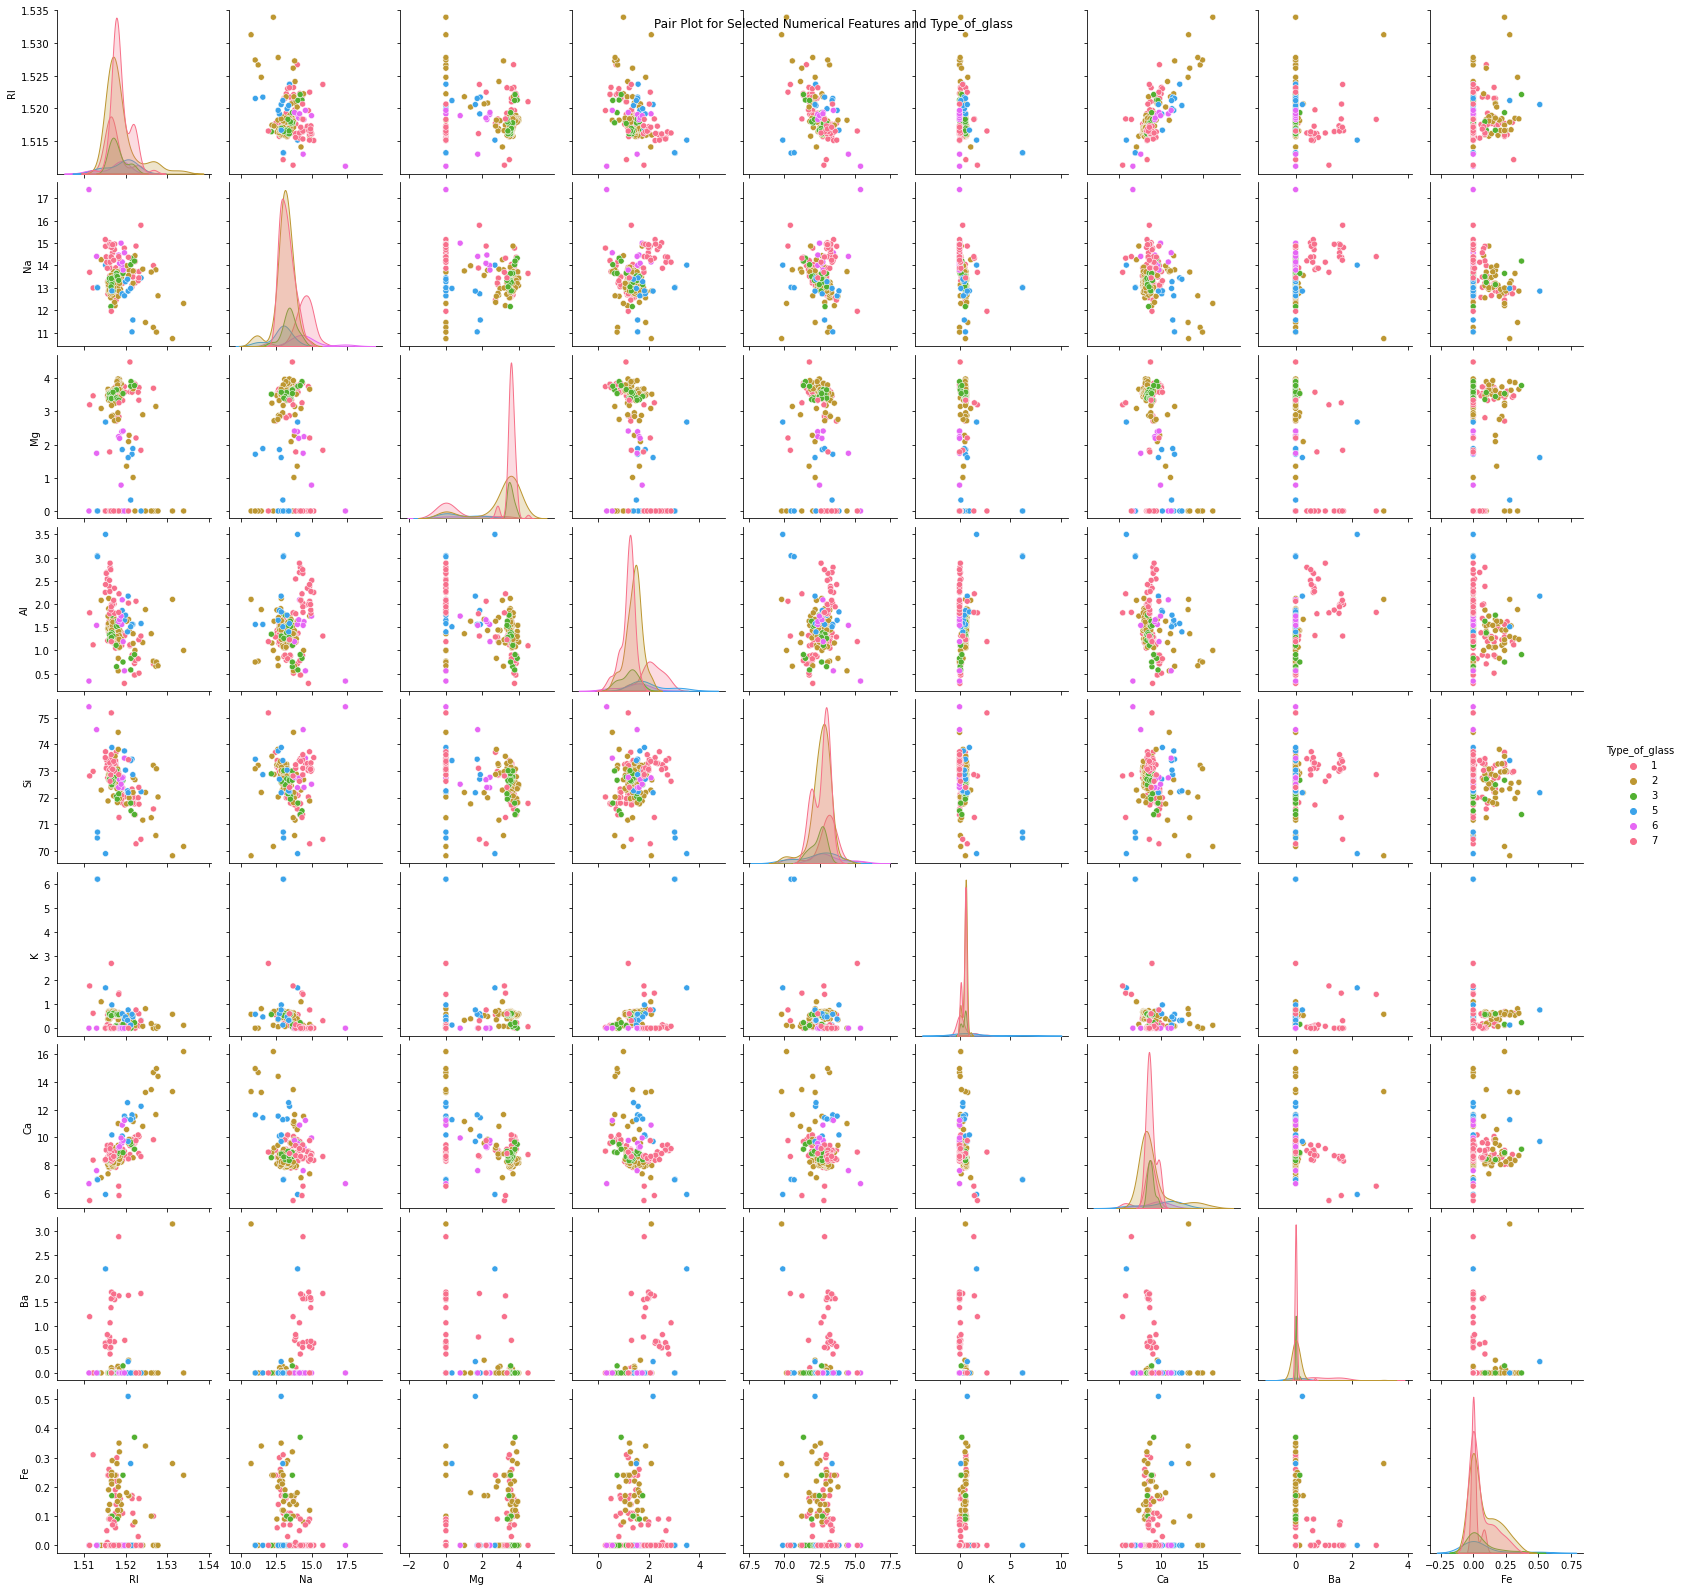

In [36]:
#A subset of numerical features for the pair plot
selected_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Combine selected features with 'Type_of_glass' for color differentiation
pairplot_data = df[selected_features + ['Type_of_glass']]

# Create a pair plot
sns.pairplot(pairplot_data, hue='Type_of_glass', palette='husl')
plt.suptitle('Pair Plot for Selected Numerical Features and Type_of_glass')
plt.show()


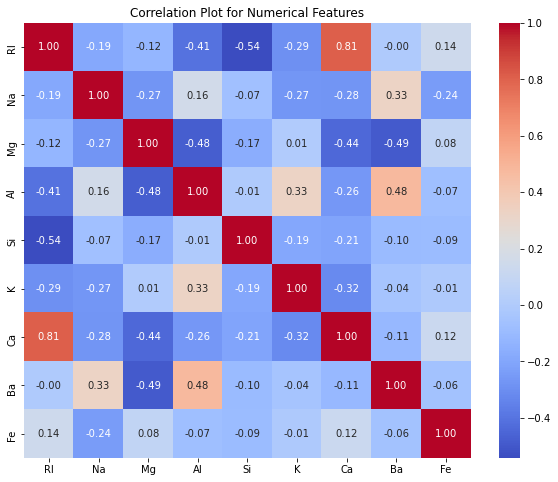

In [37]:
# Select the numerical features
numerical_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot for Numerical Features')
plt.show()

* RI(refractive index) and Ca(Calcium) are highly correlated

## Dealing with Outliers 

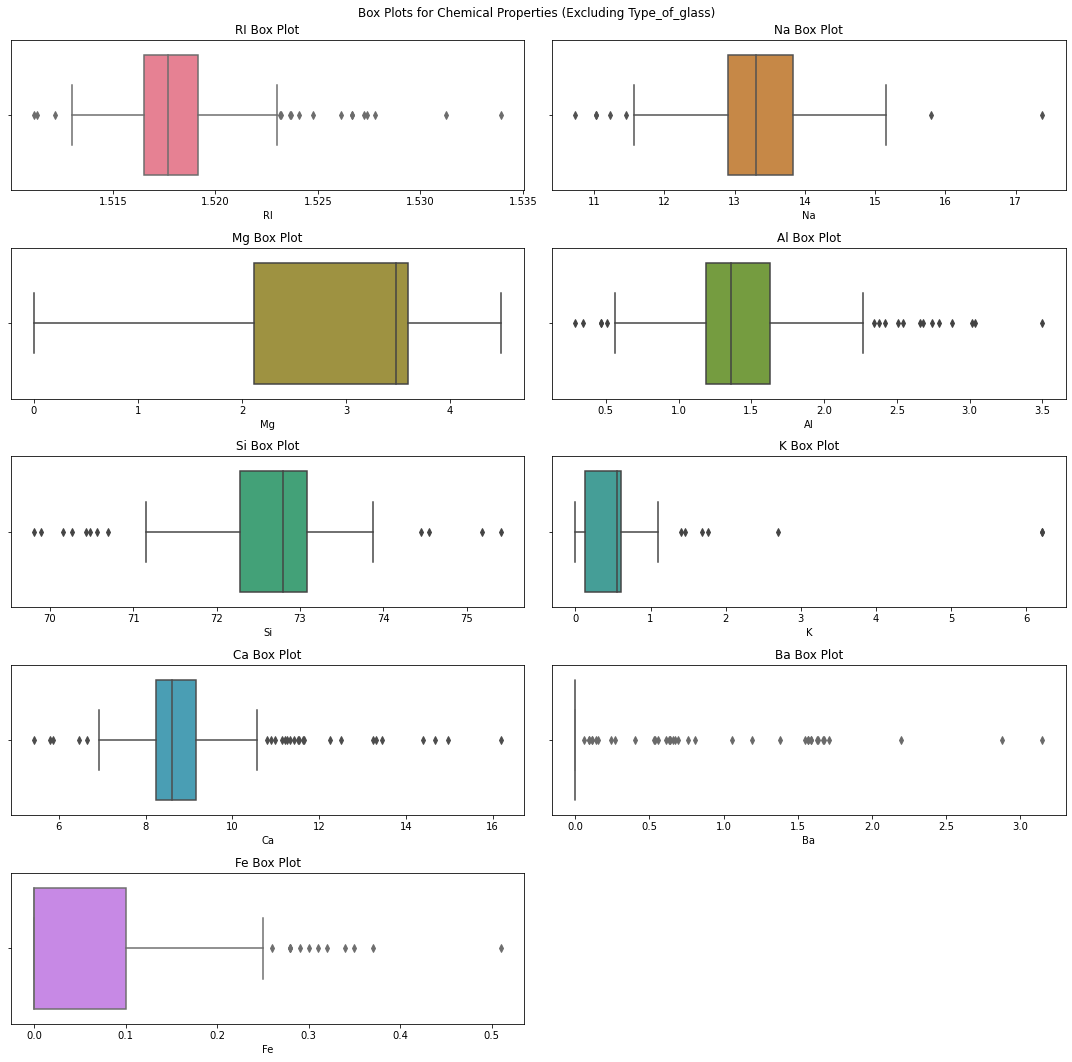

In [34]:
# Setting a custom color palette with enough colors
sns.set_palette("husl", 10)

# Defining the numerical features (excluding 'Type_of_glass')
numerical_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Create a 5x2 grid of box plots for numerical features
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
fig.suptitle('Box Plots for Chemical Properties (Excluding Type_of_glass)')

for i, feature in enumerate(numerical_features):
    row, col = i // 2, i % 2
    sns.boxplot(data=df, x=feature, ax=axes[row, col], color=sns.color_palette()[i])
    axes[row, col].set_title(f'{feature} Box Plot')
    axes[row, col].set_xlabel(feature)

# Remove any empty subplot(s) if there are more than 9 features
if len(numerical_features) < 10:
    fig.delaxes(axes[4, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Add some space for the title
plt.show()


### Seems like Barium (Ba) and potassium (K) are having major outliers 

In [43]:
#Detects observations with more than one outlier in the specified features.
# And remove the outliers


def detect_multiple_outliers(data, features):

    outliers = []
    for feature in features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        feature_outliers = data[(data[feature] < Q1 - outlier_step) | (data[feature] > Q3 + outlier_step)]
        outliers.extend(feature_outliers.index)

    multiple_outliers = [index for index, count in pd.Series(outliers).value_counts().items() if count > 1]
    return multiple_outliers

features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

multiple_outliers = detect_multiple_outliers(df, features)
filtered_data = df.drop(multiple_outliers).reset_index(drop=True)

print(f"Original data shape: {df.shape}")
print(f"Filtered data shape: {filtered_data.shape}")

Original data shape: (214, 10)
Filtered data shape: (179, 10)


In [44]:
filtered_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
174,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
175,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
176,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
177,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Since the numeric values varies differently in a wide range, we will use "_MinMaxScaler_" to Normalize the Data

## Normalize Data

In [56]:
# Specify the features and labels
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
label = ['Type_of_glass']

# Separate the features and labels from the filtered_data
X = filtered_data[features]
y = filtered_data[label]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the features and transform them
X_normalized = scaler.fit_transform(X)

# Create a new DataFrame with the normalized features
normalized_data = pd.DataFrame(X_normalized, columns=features)

# Concatenate the normalized features with the labels
final_data = pd.concat([normalized_data, y], axis=1)

# The final_data DataFrame now contains the normalized features and labels


In [58]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [59]:
y

,Type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
174,7
175,7
176,7
177,7


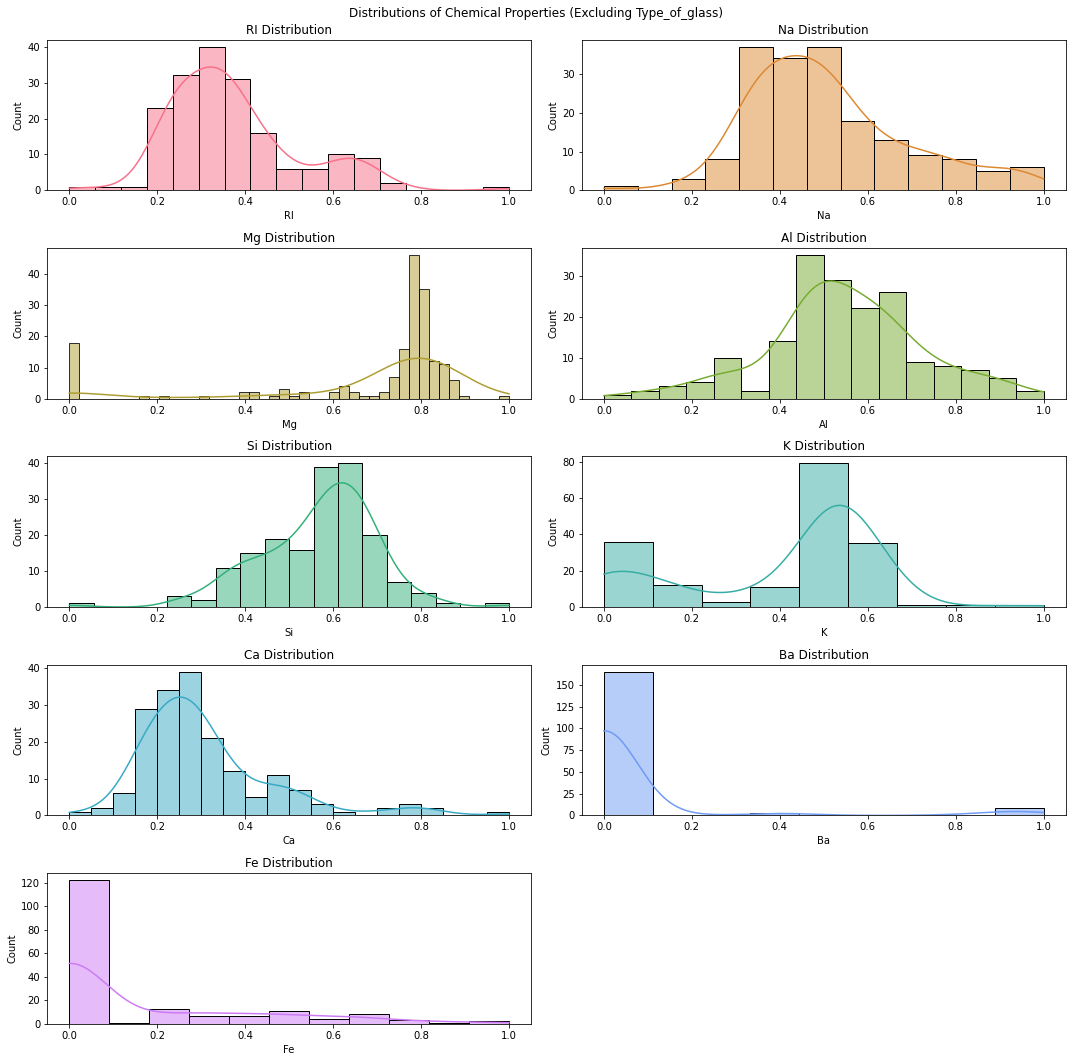

In [57]:
# Setting a custom color palette with enough colors
sns.set_palette("husl", 10)

# Defining the numerical features (excluding 'Type_of_glass')
numerical_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Create a 5x2 grid of distribution plots for numerical features
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
fig.suptitle('Distributions of Chemical Properties (Excluding Type_of_glass)')

for i, feature in enumerate(numerical_features):
    row, col = i // 2, i % 2
    sns.histplot(final_data[feature], kde=True, color=sns.color_palette()[i], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

# Remove any empty subplot(s) if there are more than 9 features
if len(numerical_features) < 10:
    fig.delaxes(axes[4, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Add some space for the title
plt.show()


* Most of the data is normalized 

## Splitting Train-Test data 

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [68]:
# Separate the features and labels from the final_data
X = final_data[features]
y = final_data[label]

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Convert the target variables to 1D NumPy arrays
y_train = y_train.values[:, 0]
y_test = y_test.values[:, 0]

# Print the shapes of the data splits
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))

Shape of X_train = (134, 9)
Shape of X_test = (45, 9)
Shape of y_train = (134,)
Shape of y_test = (45,)


In [77]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Stochastic Gradient Boosting (SGB)': GradientBoostingClassifier(n_estimators=100, subsample=0.5, max_depth=2, random_state=0)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Calculate training and testing accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    report = classification_report(y_test, y_test_pred)  # Use class labels directly
    
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {accuracy_train:.2f}")
    print(f"Testing Accuracy: {accuracy_test:.2f}")
    print(report)
    print("-" * 50)


Classifier: Logistic Regression
Training Accuracy: 0.66
Testing Accuracy: 0.64
              precision    recall  f1-score   support

           1       0.65      0.65      0.65        17
           2       0.62      0.88      0.73        17
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.75      0.75      0.75         4

    accuracy                           0.64        45
   macro avg       0.34      0.38      0.35        45
weighted avg       0.55      0.64      0.59        45

--------------------------------------------------
Classifier: Random Forest
Training Accuracy: 1.00
Testing Accuracy: 0.78
              precision    recall  f1-score   support

           1       0.76      0.76      0.76        17
           2       0.83      0.88      0.86        17
           3       0.40      0.50      0.44         4
           5       0.00      0.00    

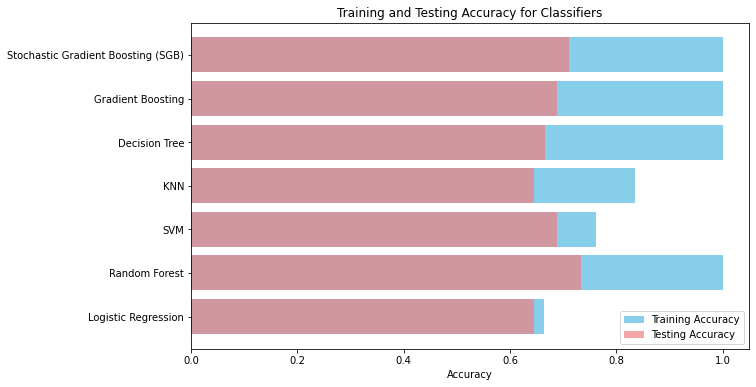

In [79]:
# Initialize classifiers and convert dict_keys to a list
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Stochastic Gradient Boosting (SGB)': GradientBoostingClassifier(n_estimators=100, subsample=0.5, max_depth=2, random_state=0)
}

# Get a list of classifier names from the dictionary keys
classifier_names = list(classifiers.keys())

# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Train and evaluate each classifier
for name in classifier_names:
    classifier = classifiers[name]
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Calculate training and testing accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(accuracy_train)
    test_accuracies.append(accuracy_test)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(classifier_names, train_accuracies, color='skyblue', label='Training Accuracy')
plt.barh(classifier_names, test_accuracies, color='lightcoral', label='Testing Accuracy', alpha=0.7)
plt.xlabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy for Classifiers')
plt.show()


### Key observations

* Random Forest has the highest testing accuracy  and generally performs well on precision, recall, and F1-score for most classes. This makes it a strong candidate.

* SVM also performs reasonably well with a testing accuracy of . It has good precision, recall, and F1-score for certain classes.

* (KNN)K-Nearest Neighbors has a high training accuracy , but the testing accuracy  is not as high. It may require tuning or a different approach.

* Logistic Regression has a relatively lower testing accuracy compared to Random Forest and SVM.


* Decision Tree has a perfect training accuracy but a lower testing accuracy, which is another sign of overfitting.

* Both Gradient Boosting and Stochastic Gradient Boosting (SGB) show competitive testing accuracies.

### So in this case "_Random Forest_" is best suitable model 

### Hyper parameter tuning

In [84]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10, 15],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_leaf': [1, 2, 4, 8],
    'random_state': [10, 50, 1000]
}



In [86]:
# Create a Grid Search object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the Grid Search on your data
grid_search.fit(X_train, y_train)

# Get the best parameters from the search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Training Accuracy:", best_score)



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1000}
Best Training Accuracy: 0.7393162393162391


In [87]:
# Evaluate the best estimator on the test data
y_test_pred = best_estimator.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy with Best Estimator:", test_accuracy)


Testing Accuracy with Best Estimator: 0.6888888888888889


* The training accuracy and smaller gap between training and testing accuracy suggest better generalization.

In [89]:
import pickle

# Specify the file path where you want to save the model
file_path = "Glass_Identification_rfc_model.pkl"

model = RandomForestClassifier()

# Save the model to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(best_estimator, file)